
# OT for image color adaptation

This example presents a way of transferring colors between two images
with Optimal Transport as introduced in [6]

[6] Ferradans, S., Papadakis, N., Peyre, G., & Aujol, J. F. (2014).
Regularized discrete optimal transport.
SIAM Journal on Imaging Sciences, 7(3), 1853-1882.


In [1]:
# Authors: Laetitia Chapel & Felipe Tobar
#
# Modified from POT documentation example by
# - Remi Flamary <remi.flamary@unice.fr>
# - Stanislas Chambon <stan.chambon@gmail.com>
# Original: https://pythonot.github.io/auto_examples/domain-adaptation/plot_otda_color_images.html
# License: MIT License

# sphinx_gallery_thumbnail_number = 2



import os
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt
import ot

rng = np.random.RandomState(42)

def im2mat(img):
    """Converts an image to matrix (one pixel per line)"""
    return img.reshape((img.shape[0] * img.shape[1], img.shape[2]))


def mat2im(X, shape):
    """Converts back a matrix to an image"""
    return X.reshape(shape)


def minmax(img):
    return np.clip(img, 0, 1)

## Data generation



In [2]:
# Loading images
this_file = os.path.realpath('__file__')
data_path = os.path.join(Path(this_file).parent.parent, 'Codes')

I1 = plt.imread(os.path.join(data_path, 'ihub.jpg')).astype(np.float64) / 256
I2 = plt.imread(os.path.join(data_path, 'alert.jpg')).astype(np.float64) / 256

X1 = im2mat(I1)
X2 = im2mat(I2)

print(f'size of Image 1 is {X1.shape}')
print(f'size of Image 2 is {X2.shape}')

# training samples
nb = 1000
idx1 = rng.randint(X1.shape[0], size=(nb,))
idx2 = rng.randint(X2.shape[0], size=(nb,))

Xs = X1[idx1, :]
Xt = X2[idx2, :]

size of Image 1 is (4369920, 3)
size of Image 2 is (6000000, 3)


## Plot original image



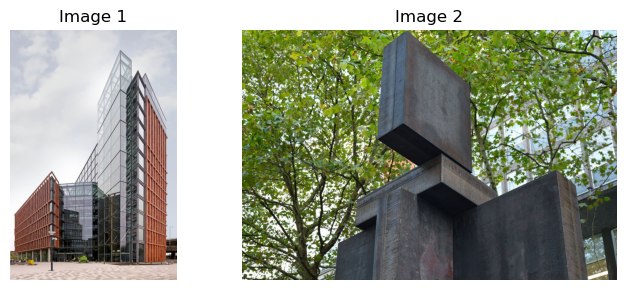

In [3]:
plt.figure(1, figsize=(7.4, 3))

plt.subplot(1, 2, 1)
plt.imshow(I1)
plt.axis('off')
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.imshow(I2)
plt.axis('off')
plt.title('Image 2')

plt.tight_layout()
plt.savefig('../img/ex1_original_images.pdf')

## Scatter plot of colors



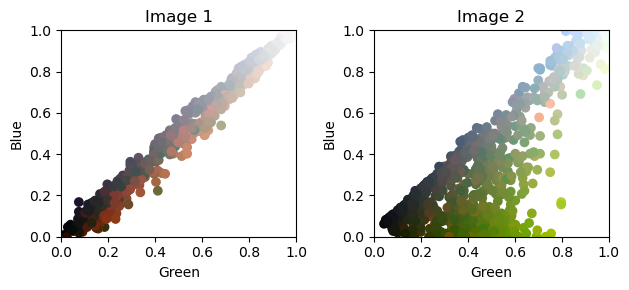

In [4]:
plt.figure(2, figsize=(6.4, 3))

plt.subplot(1, 2, 1)
plt.scatter(Xs[:, 1], Xs[:, 2], c=Xs)
plt.axis([0, 1, 0, 1])
plt.xlabel('Green')
plt.ylabel('Blue')
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.scatter(Xt[:, 1], Xt[:, 2], c=Xt)
plt.axis([0, 1, 0, 1])
plt.xlabel('Green')
plt.ylabel('Blue')
plt.title('Image 2')
plt.tight_layout()

plt.savefig('../img/ex1_colour_histograms.pdf')

## Instantiate the different transport algorithms and fit them



In [5]:
# EMDTransport
ot_emd = ot.da.EMDTransport()
ot_emd.fit(Xs=Xs, Xt=Xt)

# prediction between images (using out of sample prediction as in [6])
transp_Xs_emd = ot_emd.transform(Xs=X1)
transp_Xt_emd = ot_emd.inverse_transform(Xt=X2)

I1t = minmax(mat2im(transp_Xs_emd, I1.shape))
I2t = minmax(mat2im(transp_Xt_emd, I2.shape))

## Plot new images



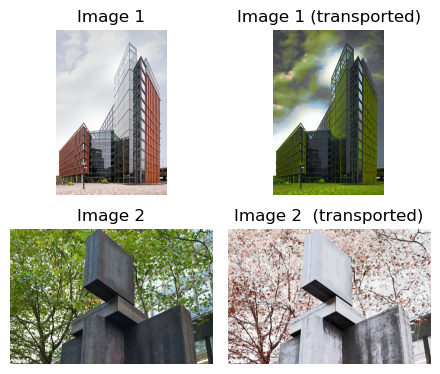

In [6]:
plt.figure(2, figsize=(4.5, 4))

plt.subplot(2, 2, 1)
plt.imshow(I1)
plt.axis('off')
plt.title('Image 1')

plt.subplot(2, 2, 2)
plt.imshow(I1t)
plt.axis('off')
plt.title('Image 1 (transported)')

plt.subplot(2, 2, 3)
plt.imshow(I2)
plt.axis('off')
plt.title('Image 2')

plt.subplot(2, 2, 4)
plt.imshow(I2t)
plt.axis('off')
plt.title('Image 2  (transported)')

plt.tight_layout()
plt.savefig('../img/ex1_result.pdf')